In [1]:
from pathlib import Path

import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import seml
from matplotlib import pyplot as plt

matplotlib.style.use("fivethirtyeight")
matplotlib.style.use("seaborn-talk")
matplotlib.rcParams["font.family"] = "monospace"
plt.rcParams["savefig.facecolor"] = "white"
sns.set_context("poster")
pd.set_option("display.max_columns", 100)

In [2]:
%load_ext lab_black

In [3]:
results = seml.get_results(
    "fold_comparison",
    to_data_frame=True,
    fields=["config", "result", "seml", "config_hash"],
    states=["COMPLETED"],
    filter_dict={
        "batch_id": 1,
        # "config.dataset.data_params.split_key": "split_ood_finetuning",  # split_ood_finetuning, split_random, split_ho_pathway, split_ho_epigenetic, split_ho_epigenetic_all
        # "config.model.append_ae_layer": False,
    },
)

  0%|          | 0/360 [00:00<?, ?it/s]

  0%|          | 0/360 [00:00<?, ?it/s]

In [4]:
results.head(5)

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,seml.command,seml.temp_dir,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.degs_key,config.dataset.data_params.dose_key,config.dataset.data_params.pert_category,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.data_params.use_drugs_idx,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.patience,config.model.additional_params.seed,config.model.append_ae_layer,config.model.embedding.directory,config.model.embedding.model,config.model.enable_cpa_mode,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dropout,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.reg_adversary_cov,config.model.hparams.reg_multi_task,config.model.hparams.step_size_lr,config.model.load_pretrained,config.model.pretrained_model_hashes.grover_base,config.model.pretrained_model_hashes.jtvae,config.model.pretrained_model_hashes.rdkit,config.model.pretrained_model_path,config.profiling.outdir,config.profiling.run_profiler,config.training.checkpoint_freq,config.training.full_eval_during_train,config.training.max_minutes,config.training.num_epochs,config.training.run_eval_disentangle,config.training.run_eval_logfold,config.training.run_eval_r2,config.training.run_eval_r2_sc,config.training.save_checkpoints,config.training.save_dir,config.seed,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.loss_multi_task,result.elapsed_time_min,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.training,result.test,result.ood,result.total_epochs,config.model.hparams.dosers_depth,config.model.hparams.dosers_width,config.model.hparams.embedding_encoder_depth,config.model.hparams.embedding_encoder_width
0,1,abb94078e92c056d28812866fa974972,chemCPA/experiments_run.py,👾_fold_comparison,/lustre/groups/ml01/projects/2021_chemicalCPA_...,chemical_CPA,/home/icb/leon.hetzel/git/chemCPA_v2,"[[chemCPA/paths.py, 6344a336fb7899846463a667],...",/lustre/groups/ml01/projects/2021_chemicalCPA_...,python chemCPA/experiments_run.py with 'datase...,/tmp/ca807c33-913e-4991-b827-2024702d18cc,1,fold_comparison,cell_type,project_folder2/datasets/adata_fold.h5ad,lincs_DEGs,dose,cov_drug_dose_name,condition,SMILES,split_fold0_A549,True,trapnell,ReLU,sigm,50,1337,False,project_folder2/embeddings,vanilla,True,4,0.000364,3,7.459343e-07,64,4,0.000561,1.329292e-07,256,32,32,0.000561,1.329292e-07,0.262378,0.199070,3.981399,8.605035,0,50,False,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,project_folder2/checkpoints,./,False,25,False,1200,201,True,False,True,False,True,project_folder2/sweeps/checkpoints,452047912,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[200],"[-3568.4440600015223, -4043.12232619524, -4137...","[15863.72972869873, 15568.753649711609, 15529....","[3510.9395491480827, 3346.5661228895187, 3309....","[44.91970027714342, 0.059775553656436387, 0.04...","[9.602624363033101, 2.332902224676218, 1.15310...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",151.093150,[0

In [5]:
results["config.model.embedding.model"].value_counts()

rdkit      240
vanilla    120
Name: config.model.embedding.model, dtype: int64

In [6]:
pd.crosstab(
    results["config.model.embedding.model"],
    results["result.perturbation disentanglement"].isnull(),
)

result.perturbation disentanglement,False
config.model.embedding.model,
rdkit,240
vanilla,120


In [7]:
[c for c in results.columns if "ae" in c]

['config.model.append_ae_layer', 'config.model.pretrained_model_hashes.jtvae']

In [8]:
pd.crosstab(
    results["config.dataset.data_params.split_key"],
    results["config.model.load_pretrained"],
)

config.model.load_pretrained,False,True
config.dataset.data_params.split_key,,
split_fold0_A549,10,5
split_fold0_K562,10,5
split_fold0_MCF7,10,5
split_fold1_A549,10,5
split_fold1_K562,10,5
split_fold1_MCF7,10,5
split_fold2_A549,10,5
split_fold2_K562,10,5
split_fold2_MCF7,10,5


In [9]:
pd.crosstab(
    results["config.dataset.data_params.split_key"],
    results["result.loss_reconstruction"].isnull(),
)

result.loss_reconstruction,False
config.dataset.data_params.split_key,
split_fold0_A549,15
split_fold0_K562,15
split_fold0_MCF7,15
split_fold1_A549,15
split_fold1_K562,15
split_fold1_MCF7,15
split_fold2_A549,15
split_fold2_K562,15
split_fold2_MCF7,15


In [10]:
results.isnull().any()[results.isnull().any()]

config.model.hparams.dosers_depth               True
config.model.hparams.dosers_width               True
config.model.hparams.embedding_encoder_depth    True
config.model.hparams.embedding_encoder_width    True
dtype: bool

In [11]:
clean_id = results.loc[~results["result.training"].isnull(), "_id"]

In [12]:
results_clean = results[results._id.isin(clean_id)].copy()
print(f"Percentage of invalid (nan) runs: {1 - len(clean_id) / len(results)}")

Percentage of invalid (nan) runs: 0.0


In [13]:
results_clean["config.model.embedding.model"].value_counts()

rdkit      240
vanilla    120
Name: config.model.embedding.model, dtype: int64

In [14]:
get_mean = lambda x: np.array(x)[-1, 0]
get_mean_de = lambda x: np.array(x)[-1, 1]

results_clean["result.training_mean"] = results_clean["result.training"].apply(get_mean)
results_clean["result.training_mean_de"] = results_clean["result.training"].apply(
    get_mean_de
)
results_clean["result.val_mean"] = results_clean["result.test"].apply(get_mean)
results_clean["result.val_mean_de"] = results_clean["result.test"].apply(get_mean_de)
results_clean["result.test_mean"] = results_clean["result.ood"].apply(get_mean)
results_clean["result.test_mean_de"] = results_clean["result.ood"].apply(get_mean_de)
results_clean["result.perturbation disentanglement"] = results_clean[
    "result.perturbation disentanglement"
].apply(lambda x: x[0])
results_clean["result.covariate disentanglement"] = results_clean[
    "result.covariate disentanglement"
].apply(lambda x: x[0][0])
results_clean["result.final_reconstruction"] = results_clean[
    "result.loss_reconstruction"
].apply(lambda x: x[-1])

results_clean.head(3)

,_id,config_hash,seml.executable,seml.name,seml.output_dir,seml.conda_environment,seml.working_dir,seml.source_files,seml.output_file,seml.command,seml.temp_dir,config.overwrite,config.db_collection,config.dataset.data_params.covariate_keys,config.dataset.data_params.dataset_path,config.dataset.data_params.degs_key,config.dataset.data_params.dose_key,config.dataset.data_params.pert_category,config.dataset.data_params.perturbation_key,config.dataset.data_params.smiles_key,config.dataset.data_params.split_key,config.dataset.data_params.use_drugs_idx,config.dataset.dataset_type,config.model.additional_params.decoder_activation,config.model.additional_params.doser_type,config.model.additional_params.patience,config.model.additional_params.seed,config.model.append_ae_layer,config.model.embedding.directory,config.model.embedding.model,config.model.enable_cpa_mode,config.model.hparams.adversary_depth,config.model.hparams.adversary_lr,config.model.hparams.adversary_steps,config.model.hparams.adversary_wd,config.model.hparams.adversary_width,config.model.hparams.autoencoder_depth,config.model.hparams.autoencoder_lr,config.model.hparams.autoencoder_wd,config.model.hparams.autoencoder_width,config.model.hparams.batch_size,config.model.hparams.dim,config.model.hparams.dosers_lr,config.model.hparams.dosers_wd,config.model.hparams.dropout,config.model.hparams.penalty_adversary,config.model.hparams.reg_adversary,config.model.hparams.reg_adversary_cov,config.model.hparams.reg_multi_task,config.model.hparams.step_size_lr,config.model.load_pretrained,config.model.pretrained_model_hashes.grover_base,config.model.pretrained_model_hashes.jtvae,config.model.pretrained_model_hashes.rdkit,config.model.pretrained_model_path,config.profiling.outdir,config.profiling.run_profiler,config.training.checkpoint_freq,config.training.full_eval_during_train,config.training.max_minutes,config.training.num_epochs,config.training.run_eval_disentangle,config.training.run_eval_logfold,config.training.run_eval_r2,config.training.run_eval_r2_sc,config.training.save_checkpoints,config.training.save_dir,config.seed,result.epoch,result.stats_epoch,result.loss_reconstruction,result.loss_adv_drugs,result.loss_adv_covariates,result.penalty_adv_drugs,result.penalty_adv_covariates,result.loss_multi_task,result.elapsed_time_min,result.perturbation disentanglement,result.optimal for perturbations,result.covariate disentanglement,result.optimal for covariates,result.training,result.test,result.ood,result.total_epochs,config.model.hparams.dosers_depth,config.model.hparams.dosers_width,config.model.hparams.embedding_encoder_depth,config.model.hparams.embedding_encoder_width,result.training_mean,result.training_mean_de,result.val_mean,result.val_mean_de,result.test_mean,result.test_mean_de,result.final_reconstruction
0,1,abb94078e92c056d28812866fa974972,chemCPA/experiments_run.py,👾_fold_comparison,/lustre/groups/ml01/projects/2021_chemicalCPA_...,chemical_CPA,/home/icb/leon.hetzel/git/chemCPA_v2,"[[chemCPA/paths.py, 6344a336fb7899846463a667],...",/lustre/groups/ml01/projects/2021_chemicalCPA_...,python chemCPA/experiments_run.py with 'datase...,/tmp/ca807c33-913e-4991-b827-2024702d18cc,1,fold_comparison,cell_type,project_folder2/datasets/adata_fold.h5ad,lincs_DEGs,dose,cov_drug_dose_name,condition,SMILES,split_fold0_A549,True,trapnell,ReLU,sigm,50,1337,False,project_folder2/embeddings,vanilla,True,4,0.000364,3,7.459343e-07,64,4,0.000561,1.329292e-07,256,32,32,0.000561,1.329292e-07,0.262378,0.199070,3.981399,8.605035,0,50,False,ff420aea264fca7668ecb147f60762a1,a7060ac4e2c6154e64a13acd414cbba2,4f061dbfc7af05cf84f06a724b0c8563,project_folder2/checkpoints,./,False,25,False,1200,201,True,False,True,False,True,project_folder2/sweeps/checkpoints,452047912,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",[200],"[-3568.4440600015223, -4043.12232619524, -4137...","[15863.72972869873, 15568.753649711609, 15529....","[3510.9395491480827, 3346.5661228895187, 3309....","[44.91970027714342, 0.0

In [15]:
[c for c in results_clean.columns if "pretrain" in c]

results_clean[
    [
        "config.model.embedding.model",
        "config.model.load_pretrained",
        "config.dataset.data_params.split_key",
    ]
].drop_duplicates()

,config.model.embedding.model,config.model.load_pretrained,config.dataset.data_params.split_key
0,vanilla,False,split_fold0_A549
5,vanilla,False,split_fold0_MCF7
10,vanilla,False,split_fold0_K562
15,vanilla,False,split_fold1_A549
20,vanilla,False,split_fold1_MCF7
...,...,...,...
335,rdkit,False,split_fold7_A549
340,rdkit,True,split_fold7_MCF7
345,rdkit,False,split_fold7_MCF7
350,rdkit,True,split_fold7_K562


In [18]:
splits = results["config.dataset.data_params.split_key"].unique()

splits

array(['split_fold0_A549', 'split_fold0_MCF7', 'split_fold0_K562',
       'split_fold1_A549', 'split_fold1_MCF7', 'split_fold1_K562',
       'split_fold2_A549', 'split_fold2_MCF7', 'split_fold2_K562',
       'split_fold3_A549', 'split_fold3_MCF7', 'split_fold3_K562',
       'split_fold4_A549', 'split_fold4_MCF7', 'split_fold4_K562',
       'split_fold5_A549', 'split_fold5_MCF7', 'split_fold5_K562',
       'split_fold6_A549', 'split_fold6_MCF7', 'split_fold6_K562',
       'split_fold7_A549', 'split_fold7_MCF7', 'split_fold7_K562'],
      dtype=object)

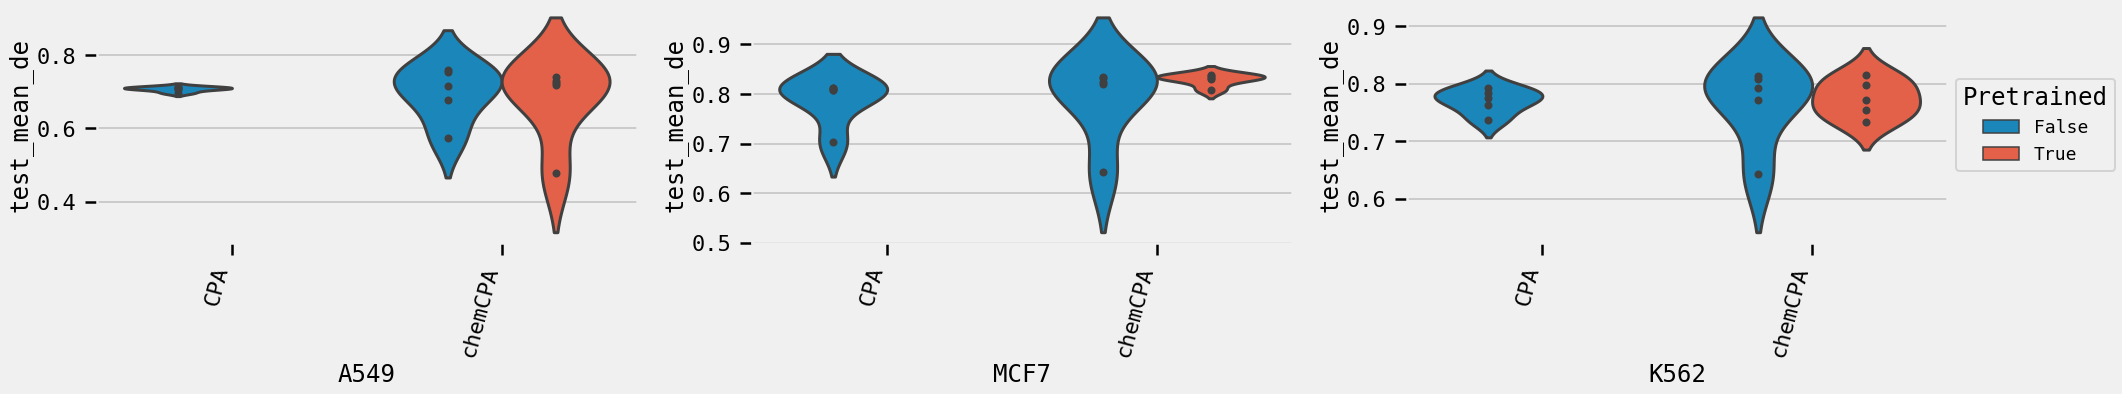

In [20]:
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(10 * cols, 6 * rows))

# for i, y in enumerate(
#     ("result.training_mean_de", "result.val_mean_de", "result.test_mean_de")
# ):
for i, y in enumerate(splits[:3]):
    sns.violinplot(
        data=results_clean[results_clean["config.dataset.data_params.split_key"] == y],
        x="config.model.embedding.model",
        y="result.test_mean_de",
        hue="config.model.load_pretrained",
        inner="points",
        ax=ax[i],
        scale="width",
    )
    # ax[i].set_ylim([0.3,1.01])
    ax[i].set_xticklabels(["CPA", "chemCPA"])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha="right")
    ax[i].set_xlabel(y.split("_")[-1])
    ax[i].set_ylabel("test_mean_de")
    ax[i].legend(title="Pretrained", loc="lower right", fontsize=18, title_fontsize=24)

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].legend(
    title="Pretrained",
    fontsize=18,
    title_fontsize=24,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
plt.tight_layout()

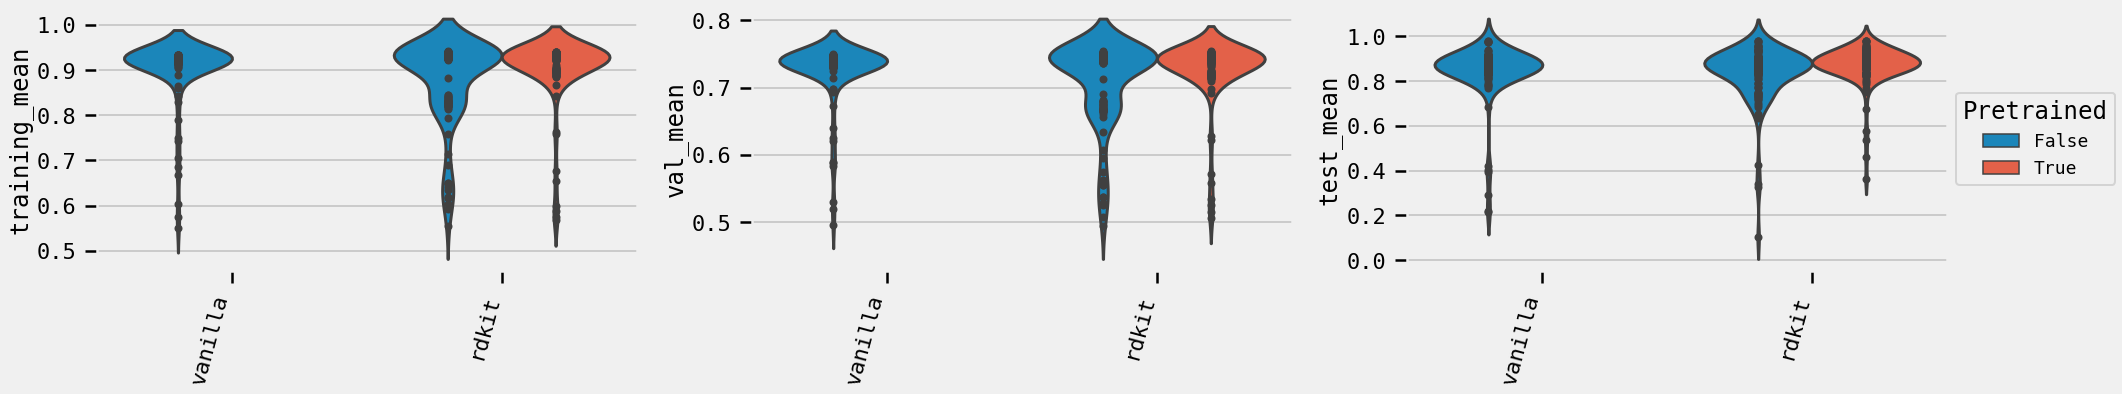

In [21]:
rows, cols = 1, 3
fig, ax = plt.subplots(rows, cols, figsize=(10 * cols, 6 * rows))

for i, y in enumerate(("result.training_mean", "result.val_mean", "result.test_mean")):
    sns.violinplot(
        data=results_clean,
        x="config.model.embedding.model",
        y=y,
        hue="config.model.load_pretrained",
        inner="points",
        ax=ax[i],
        scale="width",
    )
    # ax[i].set_ylim([0.3,1.01])
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha="right")
    ax[i].set_xlabel("")
    ax[i].set_ylabel(y.split(".")[-1])
    ax[i].legend(title="Pretrained", loc="lower right", fontsize=18, title_fontsize=24)

ax[0].get_legend().remove()
ax[1].get_legend().remove()
ax[2].legend(
    title="Pretrained",
    fontsize=18,
    title_fontsize=24,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
plt.tight_layout()

Igoring splits split_fold1_A549
Igoring splits split_fold1_K562
Igoring splits split_fold1_MCF7
Igoring splits split_fold2_A549
Igoring splits split_fold2_K562
Igoring splits split_fold2_MCF7
Igoring splits split_fold3_A549
Igoring splits split_fold3_K562
Igoring splits split_fold3_MCF7
Igoring splits split_fold4_A549
Igoring splits split_fold4_K562
Igoring splits split_fold4_MCF7
Igoring splits split_fold5_A549
Igoring splits split_fold5_K562
Igoring splits split_fold5_MCF7
Igoring splits split_fold6_A549
Igoring splits split_fold6_K562
Igoring splits split_fold6_MCF7
Igoring splits split_fold7_A549
Igoring splits split_fold7_K562
Igoring splits split_fold7_MCF7
Igoring splits split_fold1_A549
Igoring splits split_fold1_K562
Igoring splits split_fold1_MCF7
Igoring splits split_fold2_A549
Igoring splits split_fold2_K562
Igoring splits split_fold2_MCF7
Igoring splits split_fold3_A549
Igoring splits split_fold3_K562
Igoring splits split_fold3_MCF7
Igoring splits split_fold4_A549
Igoring 

IndexError: index 2 is out of bounds for axis 0 with size 2

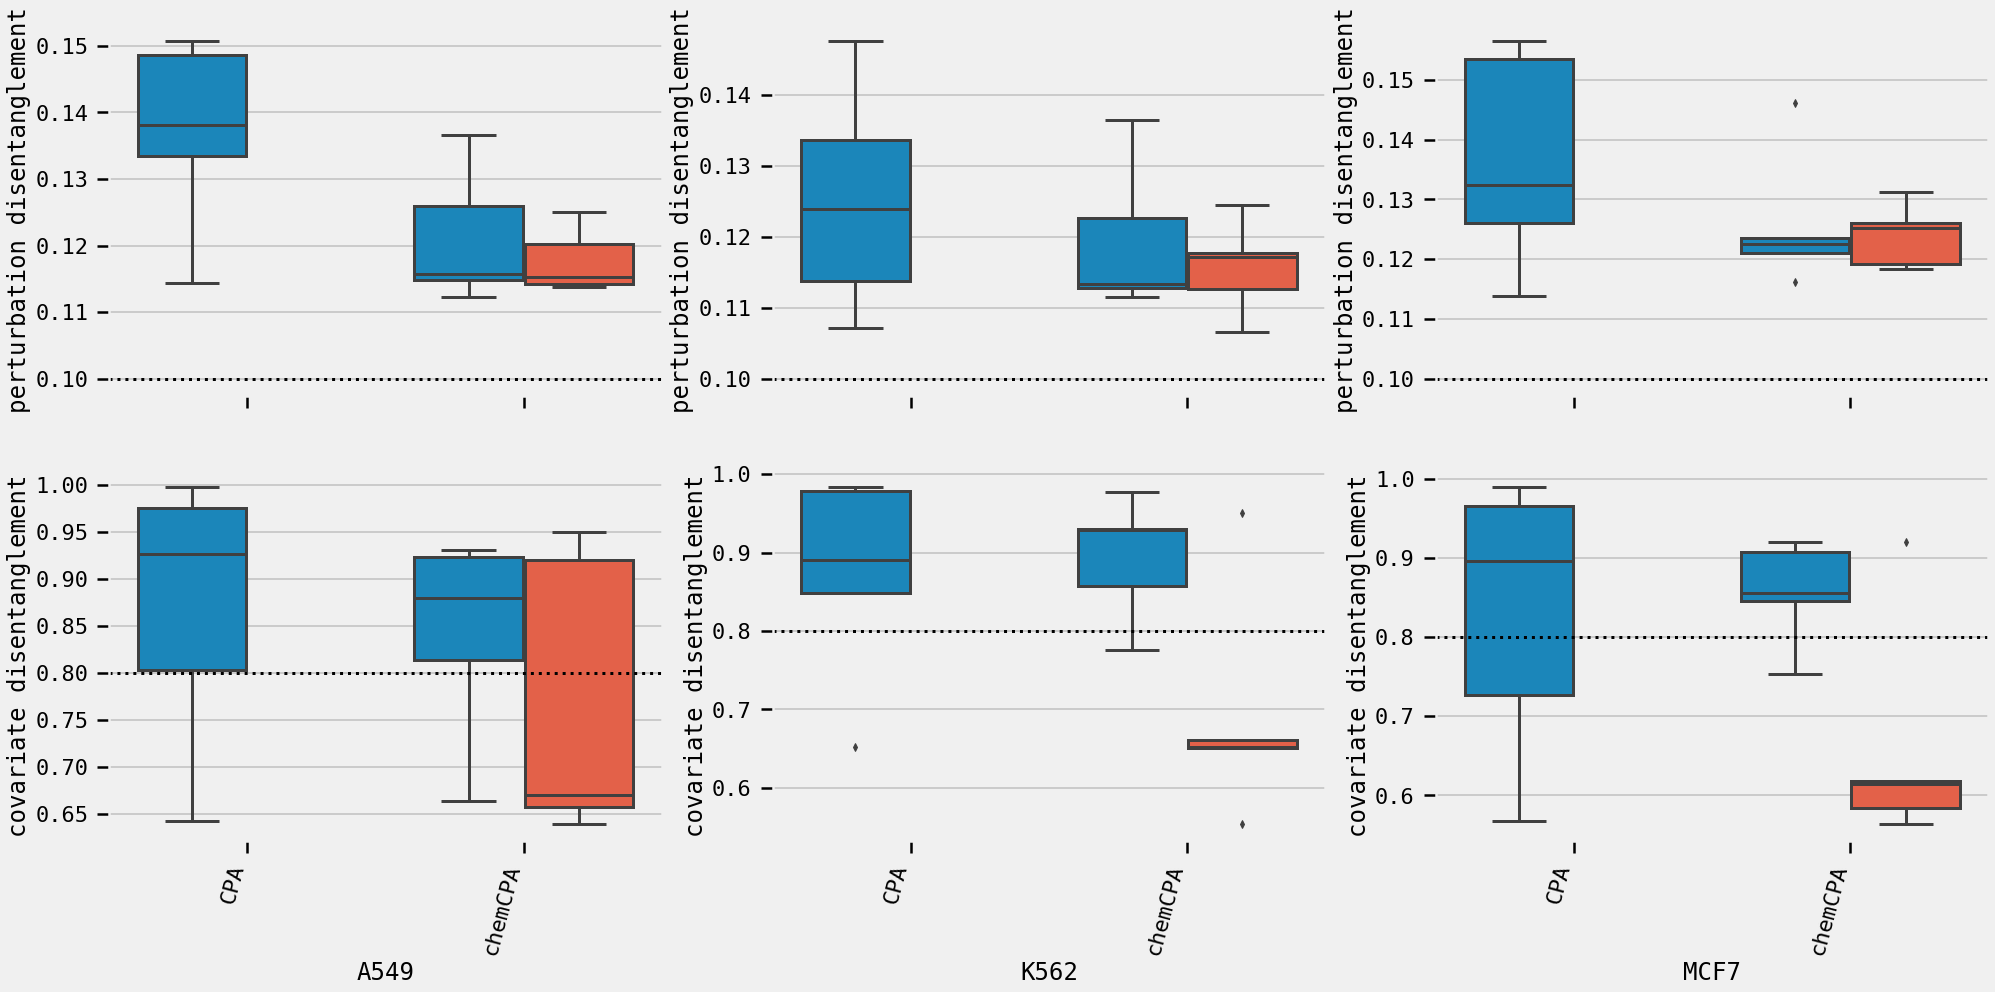

In [24]:
rows = 2
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(10 * cols, 7 * rows), sharex=True)

max_entangle = [0.1, 0.8]
for i, y in enumerate(
    ["result.perturbation disentanglement", "result.covariate disentanglement"]
):
    for j, (ct, df) in enumerate(
        results_clean.groupby("config.dataset.data_params.split_key")
    ):
        if j > 2:
            print(f"Igoring splits {ct}")
            continue
        sns.boxplot(
            data=df,
            x="config.model.embedding.model",
            y=y,
            # inner="point",
            # kind='violin',
            ax=ax[i, j],
            hue="config.model.load_pretrained",
        )
        axis = ax[i, j]
        # ax[i].set_ylim([0,1])
        axis.set_xticklabels(["CPA", "chemCPA"])
        axis.set_xticklabels(axis.get_xticklabels(), rotation=75, ha="right")
        axis.axhline(max_entangle[i], ls=":", color="black")
        if i == 1:
            axis.set_xlabel(ct.split("_")[-1])
        else:
            axis.set_xlabel("")

        axis.set_ylabel(y.split(".")[-1])
        axis.get_legend().remove()
ax[rows, cols].legend(
    title="Pretrained",
    fontsize=18,
    title_fontsize=24,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
plt.tight_layout()

In [25]:
n_top = 1


def performance_condition(emb, pretrained, max_entangle, max_entangle_cov):
    cond = results_clean["config.model.embedding.model"] == emb
    cond = cond & (results_clean["result.perturbation disentanglement"] < max_entangle)
    cond = cond & (results_clean["result.covariate disentanglement"] < max_entangle_cov)
    cond = cond & (results_clean["config.model.load_pretrained"] == pretrained)
    return cond


best = []
for ct, df_ct in results_clean.groupby("config.dataset.data_params.split_key"):
    for embedding in list(results_clean["config.model.embedding.model"].unique()):
        for pretrained in [True, False]:
            df = df_ct[performance_condition(embedding, pretrained, 0.13, 0.69)]
            if len(df) == 0:
                print(
                    f"Combination {embedding} {'pretrained' if pretrained else ''} did not meet disentanglement condition."
                )
                df = df_ct[performance_condition(embedding, pretrained, 0.13, 1)]
                df = df.sort_values(
                    by="result.covariate disentanglement", ascending=True
                ).head(1)
            print(embedding, pretrained, len(df))
            best.append(
                df.sort_values(by="result.val_mean_de", ascending=False).head(n_top)
            )

best = pd.concat(best)

/home/icb/leon.hetzel/miniconda3/envs/chemical_CPA/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/home/icb/leon.hetzel/miniconda3/envs/chemical_CPA/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


Combination vanilla pretrained did not meet disentanglement condition.
vanilla True 0
Combination vanilla  did not meet disentanglement condition.
vanilla False 1
rdkit True 3
rdkit False 1
Combination vanilla pretrained did not meet disentanglement condition.
vanilla True 0
vanilla False 1
rdkit True 4
Combination rdkit  did not meet disentanglement condition.
rdkit False 1
Combination vanilla pretrained did not meet disentanglement condition.
vanilla True 0
vanilla False 1
rdkit True 4
Combination rdkit  did not meet disentanglement condition.
rdkit False 1
Combination vanilla pretrained did not meet disentanglement condition.
vanilla True 0
vanilla False 1
rdkit True 4
rdkit False 1
Combination vanilla pretrained did not meet disentanglement condition.
vanilla True 0
vanilla False 1
rdkit True 3
Combination rdkit  did not meet disentanglement condition.
rdkit False 1
Combination vanilla pretrained did not meet disentanglement condition.
vanilla True 0
vanilla False 2
rdkit True 4
Co

In [26]:
pd.crosstab(
    best["config.dataset.data_params.split_key"], best["config.model.embedding.model"]
)

config.model.embedding.model,rdkit,vanilla
config.dataset.data_params.split_key,,
split_fold0_A549,2,1
split_fold0_K562,2,1
split_fold0_MCF7,2,1
split_fold1_A549,2,1
split_fold1_K562,2,1
split_fold1_MCF7,2,1
split_fold2_A549,2,1
split_fold2_K562,2,1
split_fold2_MCF7,2,1


In [42]:
folds = pd.Series(splits).apply(lambda s: s.split("_")[1]).unique()
cell_types = pd.Series(splits).apply(lambda s: s.split("_")[2]).unique()

print(folds)
print(cell_types)

['fold0' 'fold1' 'fold2' 'fold3' 'fold4' 'fold5' 'fold6' 'fold7']
['A549' 'MCF7' 'K562']


In [45]:
pd.Index(cell_types).get_loc("A549")

0

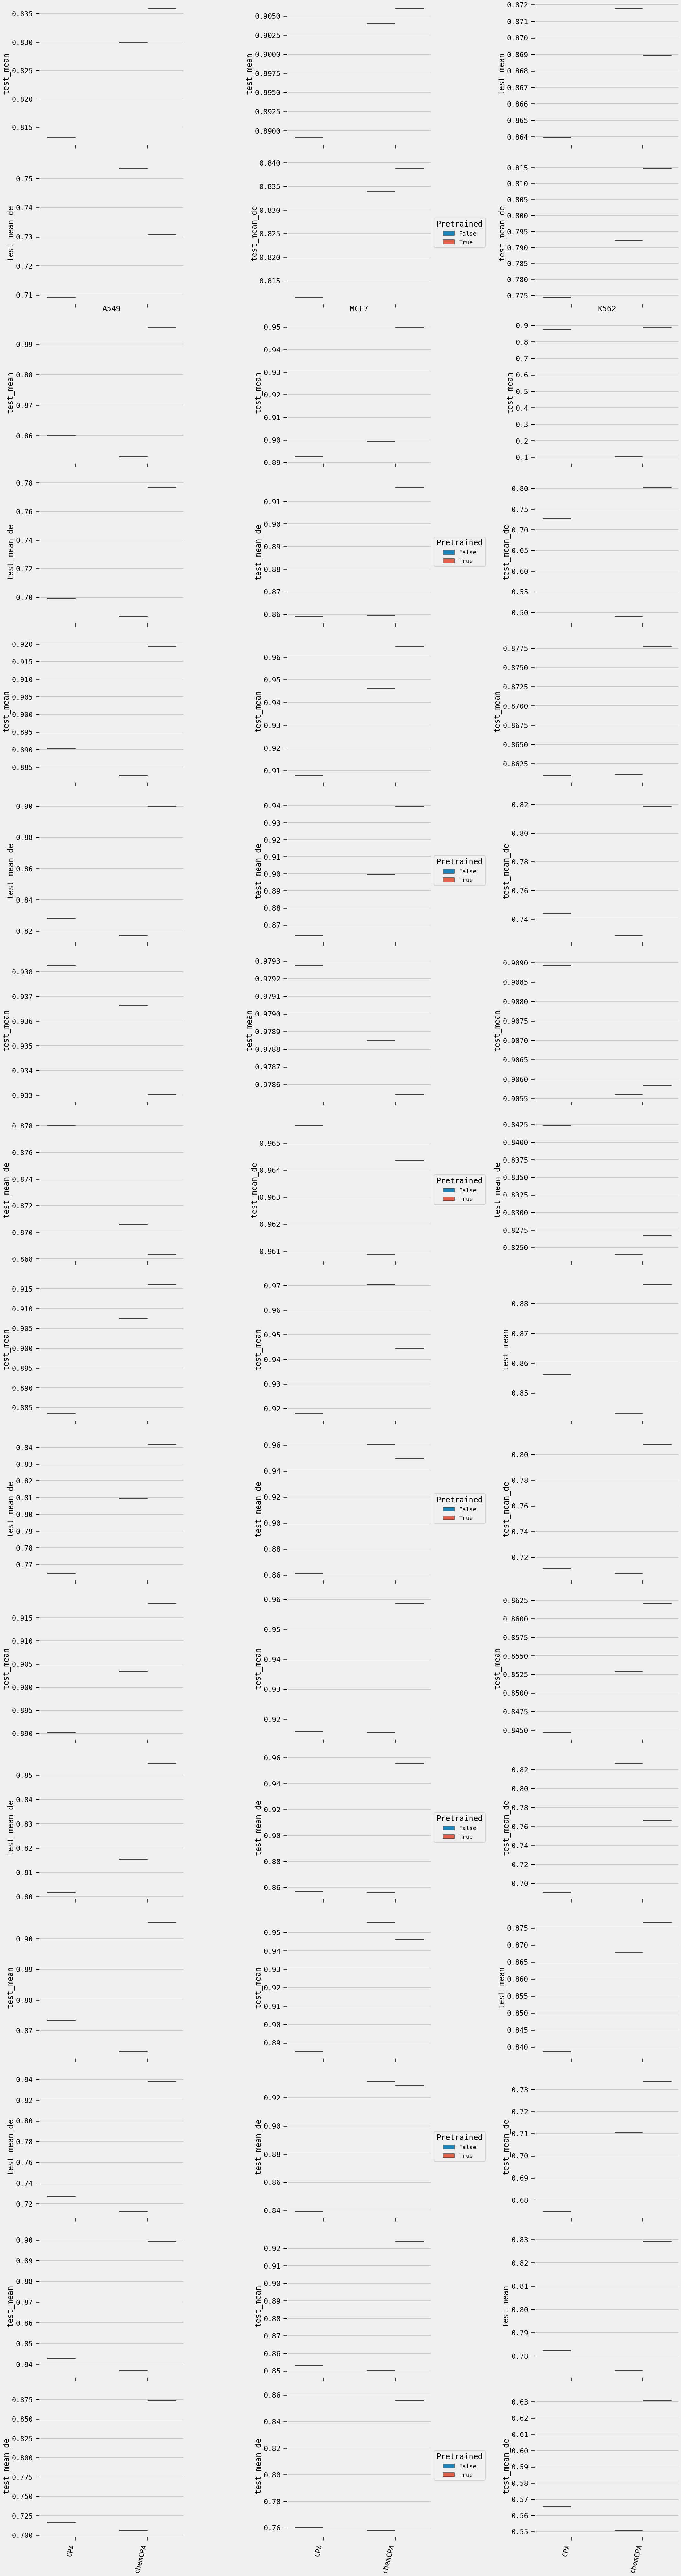

In [47]:
rows = 2 * len(folds)
cols = 3
fig, ax = plt.subplots(rows, cols, figsize=(10 * cols, 7 * rows), sharex=True)

max_entangle = [0.1, 0.8]
for ii, fold in enumerate(folds):
    for i, y in enumerate(
        [
            "result.test_mean",
            "result.test_mean_de",
        ]
    ):
        i += 2 * ii
        for _, (ct, df) in enumerate(
            best.groupby("config.dataset.data_params.split_key")
        ):
            if ct.split("_")[1] != fold:
                continue
            j = pd.Index(cell_types).get_loc(ct.split("_")[2])
            sns.boxplot(
                data=df,
                x="config.model.embedding.model",
                y=y,
                # inner="point",
                # kind='violin',
                ax=ax[i, j],
                hue="config.model.load_pretrained",
            )
            axis = ax[i, j]
            # ax[i].set_ylim([0,1])
            axis.set_xticklabels(["CPA", "chemCPA"])
            axis.set_xticklabels(axis.get_xticklabels(), rotation=75, ha="right")
            # axis.axhline(max_entangle[i], ls=":", color="black")
            if i == 1:
                axis.set_xlabel(ct.split("_")[-1])
            else:
                axis.set_xlabel("")

            axis.set_ylabel(y.split(".")[-1])
            axis.get_legend().remove()
    ax[i, j].legend(
        title="Pretrained",
        fontsize=18,
        title_fontsize=24,
        loc="center left",
        bbox_to_anchor=(1, 0.5),
    )
    plt.tight_layout()

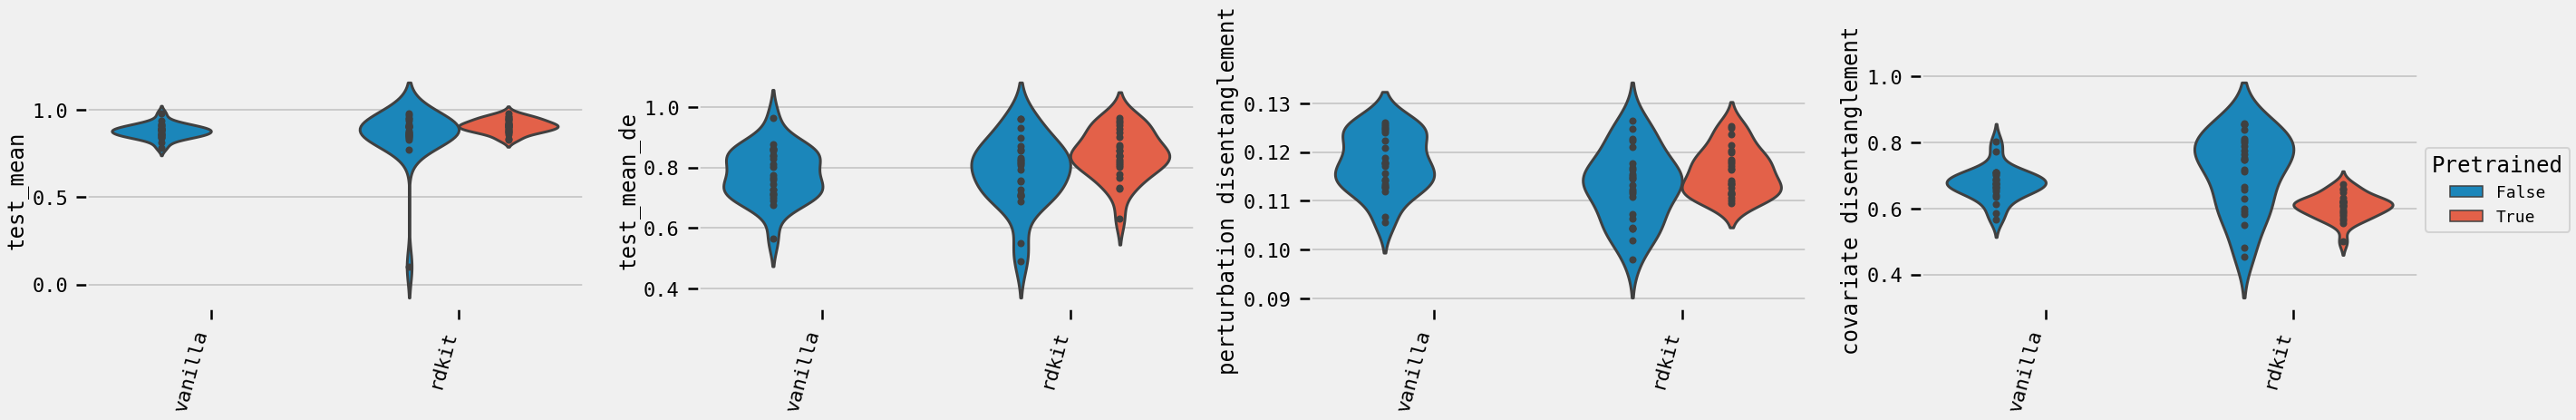

In [48]:
rows, cols = 1, 4
fig, ax = plt.subplots(rows, cols, figsize=(10 * cols, 6 * rows))

for i, y in enumerate(
    [
        "result.test_mean",
        "result.test_mean_de",
        "result.perturbation disentanglement",
        "result.covariate disentanglement",
    ]
):
    sns.violinplot(
        data=best,
        x="config.model.embedding.model",
        y=y,
        hue="config.model.load_pretrained",
        inner="points",
        ax=ax[i],
        scale="width",
    )
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=75, ha="right")
    ax[i].set_xlabel("")
    ax[i].set_ylabel(y.split(".")[-1])
    ax[i].legend(title="Pretrained", loc="lower right", fontsize=18, title_fontsize=24)
ax[0].get_legend().remove()
# ax[0].set_ylim([0.4, 1.01])
ax[1].get_legend().remove()
# ax[1].set_ylim([0.4, 1.01])
ax[2].get_legend().remove()
ax[3].legend(
    title="Pretrained",
    fontsize=18,
    title_fontsize=24,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)
plt.tight_layout()

In [49]:
cols = [
    "config.model.embedding.model",
    "config.model.load_pretrained",
    "config.dataset.data_params.split_key",
    "result.val_mean_de",
    "result.test_mean",
    "result.test_mean_de",
    "result.perturbation disentanglement",
    "result.covariate disentanglement",
    "config_hash",
]

best.loc[:, cols]

,config.model.embedding.model,config.model.load_pretrained,config.dataset.data_params.split_key,result.val_mean_de,result.test_mean,result.test_mean_de,result.perturbation disentanglement,result.covariate disentanglement,config_hash
1,vanilla,False,split_fold0_A549,0.746507,0.813134,0.709165,0.114309,0.802997,d00d54379cbb0cbeabbe73273d5f713e
120,rdkit,True,split_fold0_A549,0.772912,0.835888,0.730773,0.120249,0.657803,47dae09a43bc1c4f526ba86fde8bcdd3
128,rdkit,False,split_fold0_A549,0.768107,0.829864,0.753599,0.114766,0.664382,a38f53bf7f0125024147e25653d318bc
13,vanilla,False,split_fold0_K562,0.753765,0.863940,0.774396,0.123932,0.652573,40392a350225795a70c11f933a3111d4
140,rdkit,True,split_fold0_K562,0.770988,0.868967,0.814841,0.112657,0.661120,2ab5c7d55f3e153499b11add039f6ba0
...,...,...,...,...,...,...,...,...,...
350,rdkit,True,split_fold7_K562,0.770380,0.829261,0.630640,0.118427,0.648571,fdae85d281789a0c80bdf1a059ee7900
356,rdkit,False,split_fold7_K562,0.756825,0.773727,0.550991,0.104452,0.600555,006f8c8f1f0ee6e26b6864a829871bc4
112,vanilla,False,split_fold7_MCF7,0.748061,0.853261,0.760249,0.117607,0.585891,976da8ff90a9936df4b60751bfa1ffee
340,rdkit,True,split_fold7_MCF7,0.756969,0.923966,0.855581,0.124915,0.587645,9e921047a9240531d1645d0b6a16f8f4


In [51]:
best.loc[:, cols].groupby(
    ["config.model.embedding.model", "config.model.load_pretrained"]
).mean()

result.val_mean_de  \
config.model.embedding.model config.model.load_pretrained                       
rdkit                        False                                   0.756428   
                             True                                    0.771257   
vanilla                      False                                   0.754029   

                                                           result.test_mean  \
config.model.embedding.model config.model.load_pretrained                     
rdkit                        False                                 0.854657   
                             True                                  0.907835   
vanilla                      False                                 0.877754   

                                                           result.test_mean_de  \
config.model.embedding.model config.model.load_pretrained                        
rdkit                        False                                    0.786029   
                             True                                     0.843167   
vanilla                      False                                    0.778010   

                                                           result.perturbation disentanglement  \
config.model.embedding.model config.model.load_pretrained                                        
rdkit                        False                                                    0.113101   
                             True                                                     0.115974   
vanilla                      False                                                    0.117823   

                                                           result.covariate disentanglement  
config.model.embedding.model config.model.load_pretrained                                    
rdkit                        False                                                 0.710330  
                             True                                                  0.606312  
vanilla                      False                                                 0.676010

In [115]:
print(best.loc[:, cols].to_markdown())

|    | config.model.embedding.model   | config.model.load_pretrained   | config.dataset.data_params.split_key   |   result.val_mean_de |   result.test_mean |   result.test_mean_de |   result.perturbation disentanglement |   result.covariate disentanglement | config_hash                      |
|---:|:-------------------------------|:-------------------------------|:---------------------------------------|---------------------:|-------------------:|----------------------:|--------------------------------------:|-----------------------------------:|:---------------------------------|
|  9 | vanilla                        | False                          | split_baseline_A549                    |             0.74049  |           0.796837 |              0.664316 |                              0.110348 |                           0.644261 | 044c4dba0c8719985c3622834f2cbd58 |
| 30 | rdkit                          | True                           | split_baseline_A549                    |     